In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('convert.csv', names=['texts', 'category'], header=None)
df

,texts,category
0,หายโควิดเมื่อ 24 สิงหา วันนี้ 26 ธันวา จะเป็นอ...,neu
1,ติดโควิด=ปอดทำงานไม่เป็นธรรมชาติแล้ว หรือไม่ก็...,neu
2,เชื้อโควิดพิษร้าย,neg
3,เชื้อโควิดพิษร้าย,neg
4,พอดีว่สตาติดโควิด กักตัวได้14 วันเเล้ว เเต่ยัง...,neg
...,...,...
6375,ที่จริงเรื่องนี้ควรใช้โอกาสนี้ในการเปลี่ยนพฤติ...,neu
6376,ใครเจอปัญหาความเอาเปรียบของบริษัทประกันบ้างครั...,neg
6377,ไม่สามารถบินได้เนื่องจากโควิด ทางสายการบินเลยใ...,neg
6378,ยื่นเอกสารสินเชื่อ 7วัน บอกไม่อนุมัติ ทั้งที่เ...,neu


In [13]:
# import csv

# file1_path = './testtext.txt'
# file2_path = './testtext_label.txt'
# output_file_path = '_train.csv'

# dat = {'text': [], 'sentiment': []}

# # อ่านข้อมูลจากไฟล์1
# with open(file1_path, 'r', encoding='utf-8') as file1:
#     data1 = file1.readlines()
#     dat['text'] = [line.strip() for line in data1]

# # อ่านข้อมูลจากไฟล์2
# with open(file2_path, 'r', encoding='utf-8') as file2:
#     data2 = file2.readlines()
#     dat['sentiment'] = [line.strip() for line in data2]

# with open(output_file_path, 'w', newline='', encoding='utf-8-sig') as csv_file:
#     csv_writer = csv.writer(csv_file)

#     # เขียนหัวข้อคอลัมน์
#     # csv_writer.writerow(["sentiment", "text"])

#     # เขียนข้อมูลลงในไฟล์ CSV
#     for sentiment, text in zip(dat['sentiment'], dat['text']):
#         sentiment = sentiment.strip()
#         text = text.strip()

#         # ข้ามหากค่า "q" ในทั้งสองไฟล์
#         if sentiment == "q" or text == "q":
#             continue

#         # ข้าม index ที่มีค่า "q" ในไฟล์ "train_label.txt"
#         if sentiment == "train" and text == "q":
#             continue

#         csv_writer.writerow([sentiment, text])

# df = pd.read_csv(output_file_path, names=['category', 'texts'], header=None, encoding='utf-8-sig')
# df


,category,texts
0,neg,☹️
1,neg,😔
2,neg,😞
3,neg,😥
4,neg,รำ
...,...,...
26157,pos,พูดถึงรถยนต์ตัวท็อปที่อีซูซุผลิต หนึ่งในนั้นต้...
26158,pos,เรื่องประทับใจเกิดที่ the mall บางแค ค่ะ ❤️ เป...
26159,pos,🌞แสงแดดเมืองไทย โดยเฉพาะหน้าร้อนอย่างเดือนเมษา...
26160,pos,เราชื่นชอบและเป็นลูกค้าที่ใช้บริการ มานานถึง 3...


<Axes: xlabel='category'>

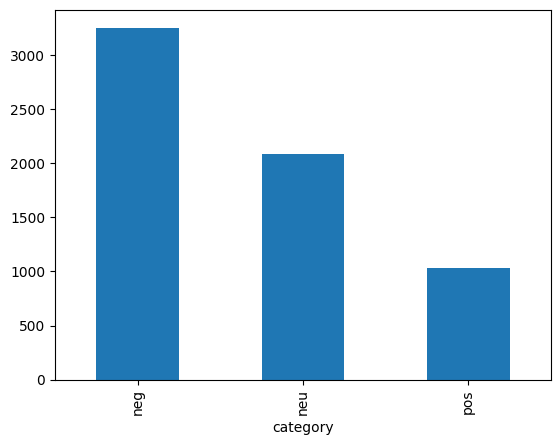

In [3]:
df['category'].value_counts().plot.bar()

In [5]:
from pythainlp.corpus.common import thai_stopwords
thai_stopwords = list(thai_stopwords())

# len(thai_stopwords)
thai_stopwords

['เฉยๆ',
 'พบว่า',
 'เพื่อที่จะ',
 'ทุกหน',
 'เช่นไร',
 'ทั้งสิ้น',
 'ล้วนแต่',
 'บอกว่า',
 'แม้ว่า',
 'จึงเป็น',
 'ใช่',
 'ใคร่จะ',
 'แยะๆ',
 'เฉย',
 'ทั้งนี้',
 'กว้างขวาง',
 'เป็นต้นไป',
 'ให้แด่',
 'จาก',
 'ก็ตามที',
 'เกี่ยวกัน',
 'ในระหว่าง',
 'ตลอด',
 'ตลอดศก',
 'กลุ่มๆ',
 'พอสม',
 'แต่ไร',
 'เช่นนั้น',
 'เช่นนี้',
 'เป็นที่',
 'กระผม',
 'จึงจะ',
 'พอๆ',
 'เช่นดังก่อน',
 'ครานี้',
 'แสดง',
 'เหล่า',
 'ถึงอย่างไร',
 'อันไหน',
 'ตั้งแต่',
 'ร่วมมือ',
 'ค่อนมาทาง',
 'เพียงพอ',
 'ถึงเมื่อไร',
 'ยิ่งจน',
 'พวกโน้น',
 'แห่งไหน',
 'ซะจน',
 'ซะ',
 'สมัยนั้น',
 'สิ้น',
 'อาจเป็นด้วย',
 'เยอะๆ',
 'นี่เอง',
 'จัง',
 'ดั่งกับว่า',
 'ยืนยง',
 'ทันใดนั้น',
 'ฉะนี้',
 'คราวหนึ่ง',
 'คราใด',
 'ส่วนดี',
 'กัน',
 'ที่',
 'รวดเร็ว',
 'เยอะ',
 'ถูก',
 'พอสมควร',
 'อนึ่ง',
 'ใหม่ๆ',
 'เปิดเผย',
 'ครั้งนั้น',
 'สูงส่ง',
 'เพียงเพื่อ',
 'ก็แค่',
 'นอกเหนือ',
 'นี้',
 'บางคราว',
 'หรือไม่',
 'ขณะใดๆ',
 'เช่นก่อน',
 'ภายภาคหน้า',
 'ฯลฯ',
 'อื่นๆ',
 'เท่ากับ',
 'เนื่องจาก',
 'ตลอดทั้ง',
 'จนแม้น',
 'จนกว

In [6]:
from pythainlp import word_tokenize
def text_process(text):
    # final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ","™","#","/","�","😅","💨","😬","👍🏻","‼️","@","/","<",">","😂","😭","☺️","❤️","😍","%",")","(","*","\"","'",",",".","”","&","^","!","~","-","+","{","}","[","]","?"
    #                                              ,"A","a","B","b","C","c","D","d","E","e","F","f"
    #                                              ,"G","g","H","h","I","i","J","j","K","k","L","l"
    #                                              ,"M","m","N","n","O","o","P","p","Q","q","R","r"
    #                                              ,"S","s","T","t","U","u","V","v","W","w","X","x"
    #                                              ,"Y","y","Z","z","1","2","3","4","5","6","7","8","9","0"
    #                                              ,"=","_","-","$","\"","|","£","¥","®","¯","▽","¼","½","¾"
    #                                              ,"É","×","á","ä","é","ò","ô","ûé"))
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ","™","#","/"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word.lower not in thai_stopwords)
    return final
df['text_tokens'] = df['texts'].apply(text_process)
df.to_csv("text_tokent.csv", index=False, encoding='utf-8-sig')
df

,texts,category,text_tokens
0,หายโควิดเมื่อ 24 สิงหา วันนี้ 26 ธันวา จะเป็นอ...,neu,หาย โควิด เมื่อ 24 สิงหา วันนี้ 26 ธันวา จะ เป...
1,ติดโควิด=ปอดทำงานไม่เป็นธรรมชาติแล้ว หรือไม่ก็...,neu,ติด โควิด = ปอด ทำงาน ไม่ เป็นธรรมชาติ แล้ว หร...
2,เชื้อโควิดพิษร้าย,neg,เชื้อ โควิด พิษร้าย
3,เชื้อโควิดพิษร้าย,neg,เชื้อ โควิด พิษร้าย
4,พอดีว่สตาติดโควิด กักตัวได้14 วันเเล้ว เเต่ยัง...,neg,พอดี ว่ส ตา ติด โควิด กักตัว ได้ 14 วัน เเล้ว ...
...,...,...,...
6375,ที่จริงเรื่องนี้ควรใช้โอกาสนี้ในการเปลี่ยนพฤติ...,neu,ที่จริง เรื่อง นี้ ควร ใช้ โอกาส นี้ ใน การ เป...
6376,ใครเจอปัญหาความเอาเปรียบของบริษัทประกันบ้างครั...,neg,ใคร เจอ ปัญหา ความ เอาเปรียบ ของ บริษัท ประกัน...
6377,ไม่สามารถบินได้เนื่องจากโควิด ทางสายการบินเลยใ...,neg,ไม่ สามารถ บิน ได้ เนื่องจาก โควิด ทาง สายการบ...
6378,ยื่นเอกสารสินเชื่อ 7วัน บอกไม่อนุมัติ ทั้งที่เ...,neu,ยื่น เอกสาร สินเชื่อ 7 วัน บอก ไม่ อนุมัติ ทั้...


In [8]:
from sklearn.model_selection import train_test_split
X = df[['text_tokens']]
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(X_train['text_tokens'])
cvec.vocabulary_
# Get the vocabulary
vocabulary = cvec.vocabulary_

# Convert vocabulary to DataFrame
df_vocabulary = pd.DataFrame(list(vocabulary.items()), columns=['Word', 'Index'])

# Save the vocabulary to a CSV file
# df_vocabulary.to_csv("vocabulary.csv", index=False, encoding='utf-8-sig')
df_vocabulary

,Word,Index
0,ให้,13352
1,นั่ง,6322
2,ข้าง,3648
3,กัน,3058
4,เพราะว่า,11753
...,...,...
13798,VS,1989
13799,"ซารส์,",4873
13800,ตื่นกลัว,5531
13801,1018521,226


In [10]:
train_bow = cvec.transform(X_train['text_tokens'])
pd.DataFrame(train_bow.toarray(), columns=cvec.get_feature_names_out(), index=X_train['text_tokens'])
dt = pd.DataFrame(train_bow.toarray(), columns=cvec.get_feature_names_out(), index=X_train['text_tokens'])
dt
# dt.to_csv("feature.csv", index=False, encoding='utf-8-sig')


,$,%,%(,%),%**,&,',"'',",'คนบูล,'ง',...,🥹💞,🥺,🥺🌷💖🤏🏻,🥺😭,🥺🥺,🥺🥺🥺🥺,🧑‍💻👩‍💻👨‍💻,🧡,🧡👍😬,🫠)
text_tokens,,,,,,,,,,,,,,,,,,,,,
ให้ นั่ง ข้าง กัน เพราะว่า อ ลายมือ ไม่ สวย เลย จะ ให้ เรา เป็น คนคุม พอ ช่วง โควิด ที่ ต้อง เรียน ออนไลน์ เรา กับ อ ก็ ยัง ติดต่อกัน อยู่ บ้าง แต่ หลัง ก็ ไม่ ได้ คุย กัน เลย ค่ะ มา ติดต่อกัน อีกที ก็ ตอ ป 6 นี่แหละ ค่ะ เวลา เจอ กันที่ โรงเรียน ก็ จะ เล่น ด้วยกัน ปรกติ แต่ ก็ แอบ ใจเต้น อยู่ บางครั้ง เวลา คุย กัน หรือ ตัว ใกล้ กัน ก็ เลย สงสัย น่ะ ค่ะ ว่า ความรู้สึก นี้ ใช่ ความรัก รึเปล่า หรือ เป็น แค่ เรื่อง ปกติ ใน วัย นี้ คะ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
เพิ่ง เริ่ม งาน ยัง ไม่ ถึง เดือน ค่ะ แต่ แฟน ติด โควิด เรา ได้ กักตัว 1 สัปดาห์ ครบ 1 สัปดาห์ เรา ตรวจ เจอ ว่า ติด เหมือนกัน เรา ไม่ สามารถ ไป ทำงาน ได้ แบบนี้ บริษัท จะ จ่าย เงิน ช่วง ที่ เรา หยุด ไหม คะ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
เคลม ประกัน โควิด กับ เมือง ไทย ประกันภัย กี่ วัน ถึง จะ ได้รับ ค่าสินไหม เรา ติดต่อ กับ ทาง เมือง ไทย ประกันภัย แทบ ทุก ช่องทาง ก็ ไม่ ได้ คำตอบ อะไร รบกวน ผู้รู้ แนะนำ หน่อย ครับ ปล เรา ยื่น เอกสาร 07022565 ที่ สน ง ใหญ่,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
คือ เหตุการณ์ นั้น มัน ได้ เกิด ขึ้นกับ ตัวเรา ฉัน เอง ฉัน ยัง จำได้ เป็น บางส่วน จึง อยาก แชร์ ประสบการณ์ ให้ ผู้ ที่ ได้ อ่าน รับรู้ ใน สิ่ง ที่ ฉัน ได้ สัมผัส และ ได้ เห็น ใน วันนั้น เรื่อง เกิดขึ้น ช่วง โควิด ซึ่ง ฉัน ได้ ทำงาน อยู่ ที่ จังหวัด สุ่ม เสี่ยง แล้ว ก็ได้ กลับบ้าน ใน ช่วง เทศกาล,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
คือ วันนี้ พึ่ง ตรวค โควิด แล้ว ผล เป็น บวก แล้วไป คุย เรียน กินข้าว เปิด แมส ตามปกติ นี่ ควร ทำ ไง ดี คะ 😢,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
มาตรการ ซี โร่ โควิด จีน ยัง ห้าม ออก ห้าม เข้า แต่ สี จิ้น ผิง ไป หลาย ประเทศ แมส ก็ ไม่ ใส่,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
เป็น ปี โควิด ออนไลน์ บ่อย พอ ช่วง เทอม 2 ก็ มี จับกลุ่ม กัน ก็ ค่อย สนิท กำลัง พอดี ค่ะ แต่ จะ เหมือน เรา คนเดียว ที่ สนิท ตาม ท้าย เสมอ คง เป็น เพราะ เรา เข้า สัมคม ไม่ เก่ง แล้วก็ ไว้ใจ แค่ เพื่อน 1 คนเดียว อ่ะ เลย เป็น งี้ เรา เริ่ม รู้สึก ก็ ช่วง นี้แหละ ค่ะ คือ กลุ่ม เรา ขออนุญาต พูด นะคะ ว่า เพื่อน,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
พึ่ง มา ติดตาม วอลเลย์บอล อยาก ทราบ ว่า ใน รายการ VNL 2022 ไม่ค่อย มี นักกีฬา ที่ คุ้น ชื่อ กับ อย่างเช่น บอส โควิด เลย อยาก ทราบ ว่า น้อง ไม่ เล่น แล้ว หรือ พัก คะ ไม่ เห็น ใน รายการ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

# Create a pipeline with TF-IDF, Logistic Regression, and hyperparameter tuning
model = make_pipeline(TfidfVectorizer(analyzer=lambda x: x.split(' ')), LogisticRegression())

# Define hyperparameters to tune
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=20, scoring='accuracy', verbose=1)
grid_search.fit(df['text_tokens'], df['category'])

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Predictions on the test set
test_predictions = best_model.predict(X_test['text_tokens'])

# Print classification report
print(classification_report(test_predictions, y_test))


Fitting 20 folds for each of 7 candidates, totalling 140 fits


c:\Users\Rosary\Desktop\nlp\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Rosary\Desktop\nlp\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

              precision    recall  f1-score   support

         neg       0.75      0.86      0.80       591
         neu       0.93      0.78      0.85      1741
         pos       0.48      0.82      0.61       285

    accuracy                           0.80      2617
   macro avg       0.72      0.82      0.75      2617
weighted avg       0.84      0.80      0.81      2617



c:\Users\Rosary\Desktop\nlp\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Create a pipeline with TF-IDF, Logistic Regression, and hyperparameter tuning
model = make_pipeline(TfidfVectorizer(analyzer=lambda x: x.split(' ')), LogisticRegression(max_iter=1000000))

# Define hyperparameters to tune
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=20, scoring='accuracy', verbose=1)
grid_search.fit(X_train['text_tokens'], y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Predictions on the test set
test_predictions = best_model.predict(X_test['text_tokens'])

# Print classification report
print(classification_report(test_predictions, y_test))

Fitting 20 folds for each of 7 candidates, totalling 140 fits
              precision    recall  f1-score   support

         neg       0.67      0.78      0.72       572
         neu       0.89      0.72      0.80      1796
         pos       0.33      0.65      0.44       249

    accuracy                           0.73      2617
   macro avg       0.63      0.72      0.65      2617
weighted avg       0.79      0.73      0.75      2617



In [46]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

# Apply Random Over-sampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train['text_tokens'].values.reshape(-1, 1), y_train)

# Create a pipeline with TF-IDF, Logistic Regression, and hyperparameter tuning
model = make_pipeline(TfidfVectorizer(analyzer=lambda x: x.split(' ')), LogisticRegression(max_iter=1000000))

# Define hyperparameters to tune
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=20, scoring='accuracy', verbose=1)
grid_search.fit(X_resampled.flatten(), y_resampled)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Predictions on the test set
test_predictions = best_model.predict(X_test['text_tokens'])

# Print classification report
print(classification_report(test_predictions, y_test))


Fitting 20 folds for each of 7 candidates, totalling 140 fits
              precision    recall  f1-score   support

         neg       0.66      0.67      0.67       657
         neu       0.70      0.74      0.72      1367
         pos       0.52      0.43      0.47       593

    accuracy                           0.65      2617
   macro avg       0.63      0.62      0.62      2617
weighted avg       0.65      0.65      0.65      2617



In [47]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

# Apply Random Under-sampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train['text_tokens'].values.reshape(-1, 1), y_train)

# Create a pipeline with TF-IDF, Logistic Regression, and hyperparameter tuning
model = make_pipeline(TfidfVectorizer(analyzer=lambda x: x.split(' ')), LogisticRegression(max_iter=1000000))

# Define hyperparameters to tune
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=20, scoring='accuracy', verbose=1)
grid_search.fit(X_resampled.flatten(), y_resampled)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Predictions on the test set
test_predictions = best_model.predict(X_test['text_tokens'])

# Print classification report
print(classification_report(test_predictions, y_test))


Fitting 20 folds for each of 7 candidates, totalling 140 fits
              precision    recall  f1-score   support

         neg       0.76      0.67      0.71       766
         neu       0.63      0.82      0.71      1122
         pos       0.67      0.45      0.54       729

    accuracy                           0.67      2617
   macro avg       0.69      0.64      0.65      2617
weighted avg       0.68      0.67      0.66      2617



In [48]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline
# dv = DictVectorizer(sparse=True)
# lr = LogisticRegression(solver='liblinear', max_iter=1000000)
# tran_sparse = dv.fit_transform(train_bow)
# # lr = make_pipeline(StandardScaler(with_mean=False), LogisticRegression(solver='liblinear', max_iter=1000000))
# lr.fit(tran_sparse, y_train)
from scipy.sparse import csr_matrix

# Assuming train_bow is a sparse matrix (e.g., a scipy.sparse.csr_matrix)
train_bow_sparse = csr_matrix(train_bow)

lr = make_pipeline(LogisticRegression(solver='liblinear', max_iter=1000000))
lr.fit(train_bow_sparse, y_train)

Pipeline(steps=[('logisticregression',
                 LogisticRegression(max_iter=1000000, solver='liblinear'))])

In [49]:
from sklearn.metrics import confusion_matrix,classification_report
test_bow = cvec.transform(X_test['text_tokens'])
test_predictions = lr.predict(test_bow)
test_bow = cvec.transform(X_test['text_tokens'])
test_predictions = lr.predict(test_bow)
print(classification_report(test_predictions, y_test))

              precision    recall  f1-score   support

         neg       0.65      0.78      0.71       565
         neu       0.88      0.72      0.79      1772
         pos       0.34      0.59      0.43       280

    accuracy                           0.72      2617
   macro avg       0.62      0.70      0.64      2617
weighted avg       0.77      0.72      0.73      2617



In [50]:
my_text = 'ผมรู้สึกปวดหัว'
my_tokens = text_process(my_text)
my_bow = cvec.transform(pd.Series([my_tokens]))
my_predictions = lr.predict(my_bow)
my_predictions

array(['neg'], dtype=object)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline
from scipy.sparse import csr_matrix
dv = DictVectorizer(sparse=False)
train_bow_vectorized = csr_matrix(train_bow)
dt = DecisionTreeClassifier()

pipeline = make_pipeline(dt)
pipeline.fit(train_bow_vectorized, y_train)
from sklearn.metrics import confusion_matrix,classification_report
test_bow = cvec.transform(X_test['text_tokens'])
test_predictions = pipeline.predict(test_bow)
test_bow = cvec.transform(X_test['text_tokens'])
test_predictions = pipeline.predict(test_bow)
print(classification_report(test_predictions, y_test))

              precision    recall  f1-score   support

         neg       0.59      0.60      0.60       661
         neu       0.71      0.70      0.71      1476
         pos       0.41      0.42      0.42       480

    accuracy                           0.63      2617
   macro avg       0.57      0.57      0.57      2617
weighted avg       0.63      0.63      0.63      2617



: 